# Laboratory 4

## Description of the `IMDB` dataset
The `IMDB` dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. The reviews (sequences of words) have been preprocessed - turned into sequences of integers, where each integer stands for a specific word in a dictionary. 

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

The argument `num_words=10000` means we’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive. For instance, the first review consists of 218 words and is positive:

In [11]:
import numpy as np
np.array(train_data[0]),len(train_data[0]),train_labels[0]

(array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
        4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
         838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
           4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
        1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
         147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
          71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
           4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
          62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
          16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
           5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
          22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
           2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
        3766,    5,  723,   36,   71, 

We can easily decode any of these reviews back to English words:

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
def decoded_review(number_of_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[number_of_review]])

In [20]:
number_of_review = 1000
decoded_review(number_of_review)

"? although i had seen ? in a theater way back in ? i couldn't remember anything of the plot except for vague images of kurt thomas running and fighting against a backdrop of stone walls and disappointment regarding the ending br br after reading some of the other reviews i picked up a copy of the newly released dvd to once again enter the world of ? br br it turns out this is one of those films produced during the '80s that would go directly to video today the film stars champion ? kurt thomas as jonathan ? ? out of the blue to ? the nation of ? to enter and hopefully win the game a ? ? ? by the khan who encourages his people by yelling what sounds like ? power the goal of the mission involves the star wars defense system jonathan is trained in the martial arts by princess ? who never speaks or leaves the house once trained tries to blend in with the locals by wearing a bright red ? with ? of blue and white needless to say ? finds himself running and fighting for his life along the st

## Task 1
Prepare the data:
- Multi-hot encode lists from `train_data` and `train_labels` to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.
- Change data type in `test_data` and `test_labels` from `int64` into `float32`.

In [24]:
import numpy as np
from tensorflow.keras.datasets import imdb

# Load IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Function to multi-hot encode sequences
def multi_hot_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype="float32")
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Multi-hot encode the training and testing data
x_train = multi_hot_sequences(train_data)
x_test = multi_hot_sequences(test_data)

# Convert labels to float32
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")


In [25]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Task 2
Build your model. Take into consideration that the input data is vectors, and the labels are scalars (1s and 0s) and a type of model that performs well on such a problem is a plain stack of densely connected (Dense) layers with relu activations. Think about:
- How many layers to use?
- How many units to choose for each layer?

Compile your model choosing a proper optimizer, loss function, and metrics.

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5016 - loss: 0.6937
Test Loss: 0.6937, Test Accuracy: 0.4970


## Task 3
Validate your model: 
- Create a validation set by setting apart 10,000 samples from the original training data.
- Train the model for 20 epochs in mini-batches of 512 samples from training data.
- Monitor loss and accuracy on the 10,000 samples from the validation set.
- Make a plot of the training and validation loss.
</br><img src=2.png/>
- Make a plot of the training and validation accuracy. 
</br><img src=3.png/>
- Choose a proper number of epochs to train the model on the entire train data to prevent overfitting, and then evaluate it on the test data.

In [29]:
import matplotlib.pyplot as plt

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6624 - loss: 0.6401 - val_accuracy: 0.8524 - val_loss: 0.4430
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8953 - loss: 0.3581 - val_accuracy: 0.8839 - val_loss: 0.3078
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9310 - loss: 0.2206 - val_accuracy: 0.8890 - val_loss: 0.2779
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9513 - loss: 0.1605 - val_accuracy: 0.8857 - val_loss: 0.2813
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9673 - loss: 0.1210 - val_accuracy: 0.8840 - val_loss: 0.2928
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9807 - loss: 0.0882 - val_accuracy: 0.8832 - val_loss: 0.3111
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9865 - loss: 0.0717 - val_accuracy: 0.8802 - val_loss: 0.3342
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9923 - loss: 0.0524 - val_accuracy: 0.8755 - val_loss

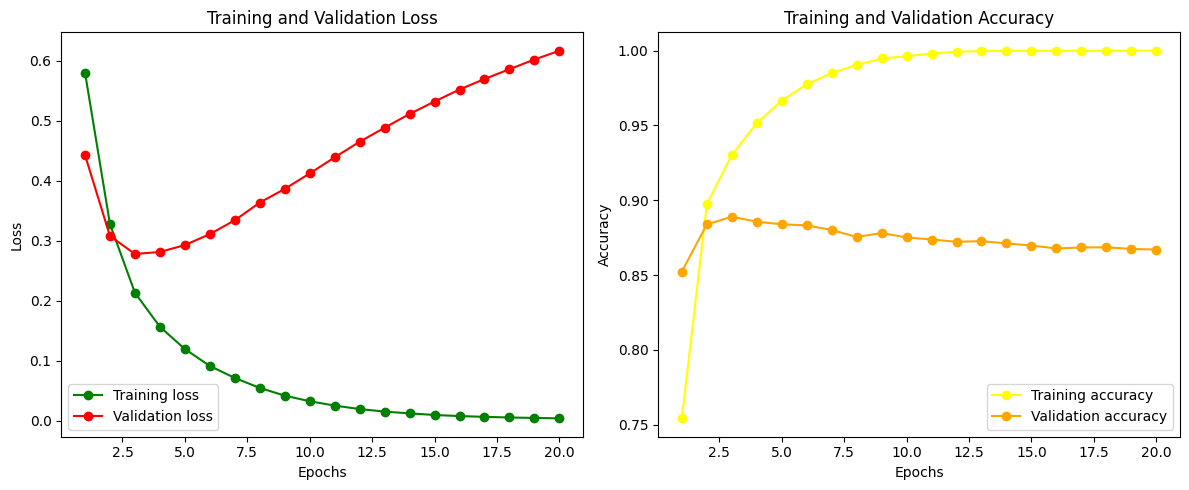

In [30]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'go-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, color = 'yellow', marker = 'o', label='Training accuracy')
plt.plot(epochs, val_acc, color = 'orange', marker = 'o', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# number of epochs: 5
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512, verbose=1)

results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6993 - loss: 0.6124
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9045 - loss: 0.2986
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.1994
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9499 - loss: 0.1536
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9608 - loss: 0.1286
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8767 - loss: 0.3234
Test Loss: 0.3223, Test Accuracy: 0.8779


## Task 4
Do the following experiments:
- Try using less or more representation layers, and see how doing so affects validation and test accuracy.
- Try using layers with more units or fewer units.
- Try using the `mse` loss function instead of `binary_crossentropy`.
- Try using the `tanh` activation instead of `relu`.